# BIOEE 4940 : **Introduction to Quantitative Analysis in Ecology**
### ***Spring 2021***
### Instructor: **Xiangtao Xu** ( ✉️ xx286@cornell.edu)
### Teaching Assistant: **Yanqiu (Autumn) Zhou** (✉️ yz399@cornell.edu)

---

## <span style="color:royalblue">Lecture 9</span> *Dimension Reduction*
*Partly adapted from [How to be a quantitative ecologist](https://www.researchgate.net/publication/310239832_How_to_be_a_Quantitative_Ecologist_The_'A_to_R'_of_Green_Mathematics_and_Statistics) and [All of Statistics](https://www.stat.cmu.edu/~larry/all-of-statistics/)*




#### 0. Class schedules
* Remaining classes:

| Date  | Plan | 
|:---   | :----:  | 
| Apr 12   | Dimension Reduction  | 
| Apr 14   | Dimension Reduction  | 
| Apr 19   | Classification/Clustering Analysis |
| Apr 21   | Spatial/Timeseries Analysis |
| Apr 26   | Wellness Day No Class (Release of Assignment 3) |
| Apr 28   | Spatial/Timeseries Analysis |
| May 3    | No class, prepare course project |
| May 5    | No class, prepare course project |
| May 10   | No class, prepare course project |
| May 12   | Course project presentation (10-15 each) |


#### 1. Multi-Dimensional Data

* Multi-dimensional data is common in ecology and environmental sciences.
    * There are multiple aspects to measure/describe the variable/process of interests
    * Our world is inherently multi-dimensional (space-time) --> multi-dimensional environment data

* We can usually represent multi-dimensional data as a matrix **M** with size *n* X *d*, where *n* denotes the number of observations/measurements and *d* denotes the number of aspect/dimensions of each observation.
    * Example : Global Plant Trait Network ([GLOPNET](http://bio.mq.edu.au/~iwright/glopian.htm))
    * Recall what kind of multi-dimensional data you have encountered?
    * Common types/sources of multi-dimensional data in ecology
        * Trait/Performance Space
        * Environment Space


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-3-c563da293e1a>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(


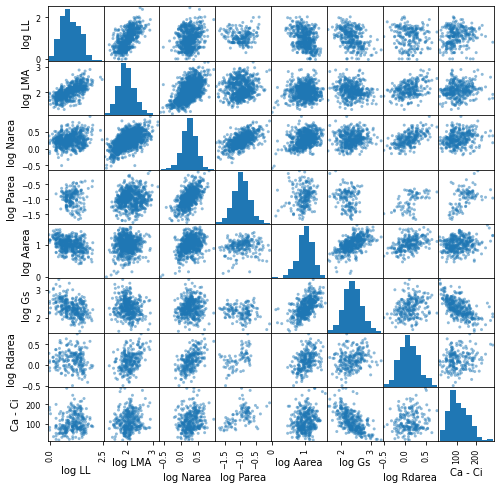

,Code,Dataset,BIOME,Species,GF,Decid/E'green,Needle/Broad lf,C3C4,N2-fixer,log LL,...,log Nmass,log Narea,log Pmass,log Parea,log Amass,log Aarea,log Gs,log Rdmass,log Rdarea,Ca - Ci
0,1,Ackerly_Jasper,WLAND,Adenostoma fasciculatum,S,E,N,C3,N,1.26,...,0.069,0.546,-0.932,-0.478,1.69,1.15,2.35,NaN,NaN,82.4
1,2,Ackerly_Jasper,WLAND,Arbutus menziesii,S,E,B,C3,N,1.17,...,0.094,0.288,-0.923,-0.735,1.86,1.05,2.18,NaN,NaN,159.0
2,3,Ackerly_Jasper,WLAND,Arctostaphylos tomentosa,S,E,B,C3,N,1.35,...,0.014,0.171,-0.994,-0.849,1.88,1.02,2.20,NaN,NaN,138.3
3,4,Ackerly_Jasper,WLAND,Artemisia californica,S,D,B,C3,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Ackerly_Jasper,WLAND,Baccharis pilularis,S,E,B,C3,N,0.95,...,0.388,0.414,-0.824,-0.793,2.21,1.24,2.33,NaN,NaN,172.3


In [3]:
df_glopnet = pd.read_csv('./data/GLOPNET.csv')

fig, ax= plt.subplots(1,1,figsize=(8,8))
pd.plotting.scatter_matrix(
    df_glopnet[
        ['log LL',
         'log LMA',
         'log Narea',
         'log Parea',
         'log Aarea',
         'log Gs',
         'log Rdarea',
         'Ca - Ci']],ax=ax)
plt.show()

df_glopnet.head()

* **Similarity** and **Difference** within multi-dimensional data are concerned.
    * How to measure similarity? 
        * (Revisit Covariance and correlation)
    * Interpretation and challenges of similarity in multi-dimensional data
        * Shared process / Coordination / Redundancy
        * Recall multi-collinearity in regression analysis

In [4]:
# covariance
print(
    df_glopnet[
        ['log LL',
         'log LMA',
         'log Aarea']].cov()
)
# correlation
print(
    df_glopnet[
        ['log LL',
         'log LMA',
         'log Aarea']].corr()
)


             log LL   log LMA  log Aarea
log LL     0.184311  0.071178  -0.030877
log LMA    0.071178  0.090899   0.003130
log Aarea -0.030877  0.003130   0.056026
             log LL   log LMA  log Aarea
log LL     1.000000  0.649822  -0.361920
log LMA    0.649822  1.000000   0.051525
log Aarea -0.361920  0.051525   1.000000


#### 2. Principal Component Analysis (PCA)
* Motivation
  Let's check the abovementioned three dimensions to describe a leaf (i.e. LL, LMA, and Aarea).
  

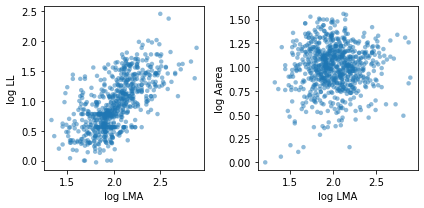

In [5]:
fig, axes = plt.subplots(1,2,figsize=(6,3))
df_glopnet.plot.scatter(x='log LMA',y='log LL',ax=axes[0]
                        ,alpha=0.5,edgecolor='none')
df_glopnet.plot.scatter(x='log LMA',y='log Aarea',ax=axes[1]
                        ,alpha=0.5,edgecolor='none')
fig.tight_layout()
plt.show()

* Questions: 
    * how confident are we about leaf longevity if we just measure leaf mass per area? 
    * How about A_area?
    * How many *orthorgonal/independent 'dimensions'* do we need to describe LL-LMA, Area-LMA, and LL-Area-LMA?

* Explanation of PCA

Principal Component Analysis is desgined to extract orthorgonal dimensions ranked by their ability to explain the variance within multi-dimensional data set.

Given a data set of d-dimensions: $X_1, X_2, ..., X_d$ (equivalent to the columns of the n by d Matrix **M** in earlier sections).

PCA generates a new set of *d* axes/components $Y_1, Y_2, ..., Y_d$ through linear transformation/combinations of the original dimensions.

$Y_i = a_{i,1}X_1 + a_{i,2}X_2 + ... + a_{i,d}X_d$

We can write $Y = AX$ in matrix notation, where both X and Y are d X n matrices (transpose of **M**) and A is a d X d matrix including the coefficients of transformation ($a_{i,j}$)

Geometrically, A performs a rotation and strech for matrix X

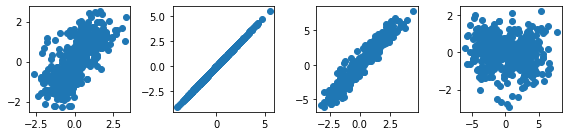

In [6]:
# example rotation for the LMA-LL relationship
# first get standardized log LMA and log LL data
from scipy.stats import zscore
df_pca = df_glopnet[['log LMA','log LL','log Aarea']].dropna()
df_pca = df_pca.assign(std_logLMA=zscore(df_pca['log LMA'])
                              ,std_logLL=zscore(df_pca['log LL'])
                              ,std_logAarea=zscore(df_pca['log Aarea'])
                              )

# assume a11 is always 1, change a12 (LL) from -2 to 2

a11 = [1,1,1,1]
a12 = [0,1,0.5,2]
a21 = [0,1,1,1]
a22 = [1,1,2,-1]

fig, axes = plt.subplots(1,len(a11),figsize=(len(a11)*2,2))
for i, ax in enumerate(axes):
    # calculate transformed data
    Y1 = a11[i] * df_pca.std_logLMA + a12[i] * df_pca.std_logLL
    Y2 = a21[i] * df_pca.std_logLMA + a22[i] * df_pca.std_logLL
    ax.scatter(Y1,Y2)
    
fig.tight_layout()
plt.show()
    

There are an infinite number of possible A matrix. However, PCA searches for the specific A matrix so that (1) the new dimensions are orthorgonal, i.e. covariance is zero and (2) the first new dimension is the line along which most of the observed variation occurs and the next axis explains the most variation of the remaining variability, etc.

It turns out that the results of PCA are associated with **eigenvalues and eigenvectors** of matrix X, which are important concepts in linear algebra.

$AX = {\lambda}X$, where $\lambda$ is a vector containing all eigenvalues.

In PCA, the elements of matrix A are called **loading** and the transformed observations are called **components**. The **explained variance** (also called inertia) of each component will also be calculated, which will **sum up to be 1**.

In [7]:
# install a python package for PCA and other related dimension reduction functionalities
# sklearn also has PCA
# FactoMineR for R

# !pip install prince
import prince

# create a pca instance
# Normally PCA requires rescaling with mean and std
# Because PCA is sensitive to variance scales
pca = prince.PCA(
        n_components=2,
        rescale_with_mean=True,
        rescale_with_std=True,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=1)

X = df_pca[['log LMA','log LL']]
X_std = zscore(X,axis=0) # for post-processing purposes

pca = pca.fit(X)
# get the transformed data
Y = pca.transform(X)

In [8]:
# get loading
# two ways
# (1)
# Y = AX, d*n = d*d X d*n
# Y(X_T) = AX(X_T)
# Y(X_T)inv(X*X_T) = A (X*X_T) * inv(X*X_T)
# --> A = Y(X_T)inv(X*X_T)
A = np.mat(Y.values.T) * np.mat(X_std) * np.linalg.inv(np.mat(X_std.T) * np.mat(X_std))
print(A)

# (2)
# Y = XA
# A is the transpose of the right matrix of Singular Value Decomposition results of X_std
A = np.linalg.svd(np.mat(X_std))[-1].T
print(A)


# (3) pca.V_
# WARNING:
# prince package uses sklearn svd algorithm which automatically flip the
# sign of the results to ensure consistent values.
# The results can have different signs with numpy svd.
# therefore, always recommend to use pca.V_.T to extract loading!
# extended reading: https://stackoverflow.com/questions/44765682/in-sklearn-decomposition-pca-why-are-components-negative


A = pca.V_.T
print(A)

# the two loadings of each axis are perpendicular
print(np.dot(np.array(A)[:,0], np.array(A)[:,1]) )


[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
0.0


In [9]:
print(X_std * np.mat(A))
print(Y)

[[ 1.6752371  -0.62170566]
 [ 0.82568594 -0.06991296]
 [ 1.01564872  0.33564118]
 ...
 [-0.80320959 -0.45915816]
 [-0.93795419 -0.32441356]
 [ 1.6325228   0.41353686]]
             0         1
0     1.675237 -0.621706
1     0.825686 -0.069913
2     1.015649  0.335641
4     0.030576 -0.002657
5     1.283818 -0.528045
...        ...       ...
2480 -0.911005 -0.351362
2485 -0.803210 -0.459158
2486 -0.803210 -0.459158
2490 -0.937954 -0.324414
2491  1.632523  0.413537

[506 rows x 2 columns]


In [10]:
# get inertia
print(pca.explained_inertia_)

[0.85214605 0.14785395]


No handles with labels found to put in legend.


0.0


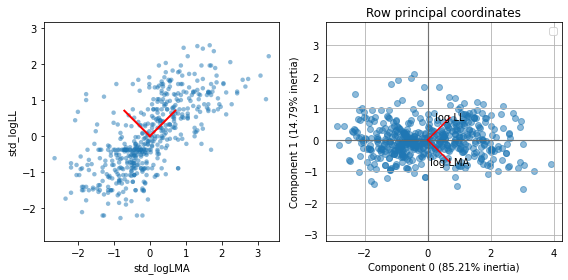

In [11]:
# visualization of the results
fig, axes = plt.subplots(1,2,figsize=(8,4))
df_pca.plot.scatter(x='std_logLMA',y='std_logLL',ax=axes[0]
                        ,alpha=0.5,edgecolor='none')
new_x = np.array(np.matrix([1,0]) * A.T).squeeze() 
new_y = np.array(np.matrix([0,1]) * A.T).squeeze()
print(np.dot(new_x,new_y) )

axes[0].plot([0,new_x[0]],[0,new_x[1]],'r',lw=2)
axes[0].plot([0,new_y[0]],[0,new_y[1]],'r',lw=2)
axes[0].axis('equal')
ax = pca.plot_row_coordinates(
     X,
     ax=axes[1],
     x_component=0,
     y_component=1,
     labels=None,
     ellipse_outline=False,
     ellipse_fill=True,
     show_points=True,
     alpha=0.5
 )
ax.axis('equal')

# add loading for each variable
var_list = ['log LMA','log LL']
for i, var in enumerate(var_list):
    x_val, y_val = A[i,0],A[i,1]
    ax.plot([0,x_val],[0,y_val],'r')
    ax.text(x_val,y_val,var,va='center',ha='center')

fig.tight_layout()

# discussion: how to interpret the figures and results?


No handles with labels found to put in legend.


[[ 0.64183091 -0.44594547]
 [ 0.72393556  0.08404033]
 [-0.25292368 -0.89110598]]
[0.58350384 0.36325257]


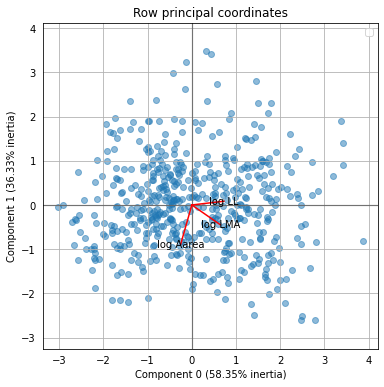

In [12]:
# 3 variables
X = df_pca[['log LMA','log LL','log Aarea']]
X_std = zscore(X,axis=0) # for post-processing purposes

pca = pca.fit(X)
# get the transformed data
Y = pca.transform(X)
A = pca.V_.T
print(A)
print(pca.explained_inertia_)

# visualization of the results
ax = pca.plot_row_coordinates(
     X,
     ax=None,
     figsize=(6,6),
     x_component=0,
     y_component=1,
     labels=None,
     ellipse_outline=False,
     ellipse_fill=True,
     show_points=True,
     alpha=0.5
 )
ax.axis('equal')

# add loading for each variable
var_list = ['log LMA','log LL','log Aarea']
for i, var in enumerate(var_list):
    x_val, y_val = A[i,0],A[i,1]
    ax.plot([0,x_val],[0,y_val],'r')
    ax.text(x_val,y_val,var,va='center',ha='center')

#fig.tight_layout()


(0.9684188525547117, 3.4501294008300294e-306)
(0.9618261357561532, 8.372531578762117e-286)
(0.9885973209480345, 0.0)


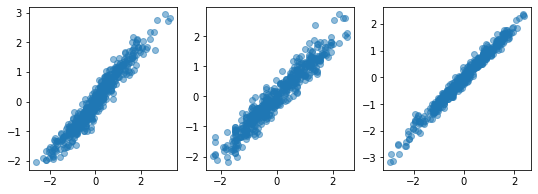

In [13]:
# dimension reduction to discarding certain (usually the last few)

# let's try to reconstruct LMA, LL, and Aarea using only the first two components
# Y -> PCA results, n by 3
# A -> loading 3 by 3
# X_std -> true original data n by 3
# note, Y = X_std * A and A is a orthorgonal matrix so inv(A) = A.T
# --> X_std = Y * A.T
# only take the first k component
# --> X_std_reconstruct = Y[:,0:k] * A.T[0:k,:]
from scipy.stats import pearsonr
k=2
X_std_r = np.array(np.mat(Y)[:,0:k] * A.T[0:k,:]) 

# scatter plot reconstructed data with raw data
fig, axes = plt.subplots(1,3,figsize=(9,3))
for i, ax in enumerate(axes):
    ax.scatter(X_std[:,i],X_std_r[:,i],alpha=0.5)
    print(pearsonr(X_std[:,i],X_std_r[:,i]))

No handles with labels found to put in legend.


[[-0.42223691 -0.50988304  0.01494869  0.09088241  0.59967025  0.4400543 ]
 [-0.11014474 -0.78221337  0.01227628  0.043809   -0.4319759  -0.43282475]
 [-0.32859127  0.11739364  0.89968879 -0.24407627 -0.08691296 -0.04098164]
 [-0.52392887  0.11665105 -0.28997275 -0.17766667 -0.59591226  0.4910499 ]
 [-0.48937845  0.18216211 -0.32523517 -0.46524812  0.30060739 -0.56100549]
 [-0.43315028  0.2599803   0.0179943   0.82597014 -0.02761015 -0.24794815]]
[0.48279091 0.24533099 0.13073715 0.08486709 0.03123677 0.02503707]
(0.9482253735731803, 1.3543167310113519e-36)
(0.9673618541645872, 1.81208482539064e-43)
(0.5771082015077437, 1.1179014860757854e-07)
(0.9028792132510053, 2.270767520604189e-27)
(0.8617367425637994, 2.5838975178304835e-22)
(0.8018579394378677, 2.599300284236677e-17)


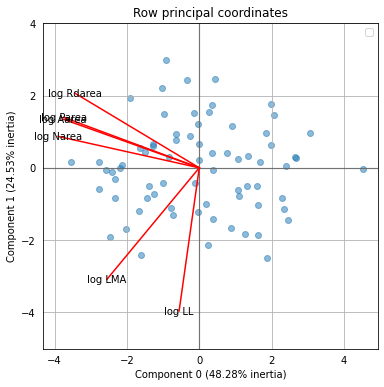

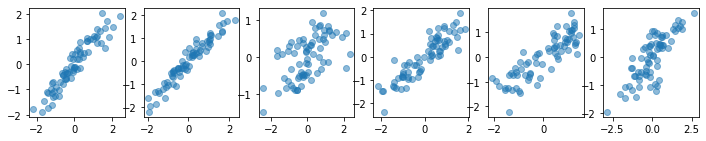

In [14]:
# what about more variables?
var_list = ['log LMA','log LL','log Aarea','log Narea','log Parea','log Rdarea']
X = df_glopnet[var_list].dropna()
X_std = zscore(X,axis=0) # for post-processing purposes

pca = prince.PCA(
        n_components=len(var_list),
        rescale_with_mean=True,
        rescale_with_std=True,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=1)



pca = pca.fit(X)
# get the transformed data
Y = pca.transform(X)
A = pca.V_.T
print(A)
print(pca.explained_inertia_)

# visualization of the results
ax = pca.plot_row_coordinates(
     X,
     ax=None,
     figsize=(6,6),
     x_component=0,
     y_component=1,
     labels=None,
     ellipse_outline=False,
     ellipse_fill=True,
     show_points=True,
     alpha=0.5
 )
ax.axis('equal')

# add loading for each variable
for i, var in enumerate(var_list):
    x_val, y_val = A[i,0],A[i,1]
    scale = 4 / np.sqrt(x_val**2+y_val**2)
    x_val = x_val * scale
    y_val = y_val * scale
    ax.plot([0,x_val],[0,y_val],'r')
    ax.text(x_val,y_val,var,va='center',ha='center')


# how about increasing k?
k=2
X_std_r = np.array(np.mat(Y)[:,0:k] * A.T[0:k,:])

# scatter plot reconstructed data with raw data
fig, axes = plt.subplots(1,len(var_list),figsize=(len(var_list)*2,2))
for i, ax in enumerate(axes):
    ax.scatter(X_std[:,i],X_std_r[:,i],alpha=0.5)
    print(pearsonr(X_std[:,i],X_std_r[:,i]))


* PCA for spatial-temporal data (Empirical Orthogonal Function)

Use EVI variations of Ithaca as an example (see Appendix for data acquisition scripts)

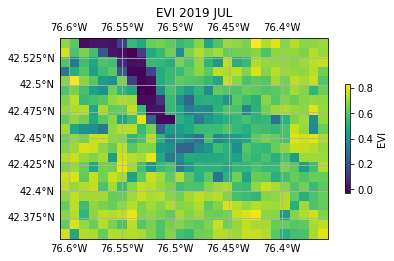

In [15]:
# visualization of EVI in JUL
filename = './data/2019_07_12.tif'
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import rasterio
import matplotlib.pyplot as plt
%matplotlib inline

src = rasterio.open(filename, 'r')
im = src.read()
# read image into ndarray

# transpose the array from (band, row, col) to (row, col, band)
im = np.transpose(im, [1,2,0])
# get EVI, the second band
EVI = im[:,:,1].squeeze() / 10000.# calculate extent of raster
# transform to cartopy format, left, right, low, up
img_extent = [src.bounds[0],src.bounds[2],src.bounds[1],src.bounds[3]]

# define cartopy crs for the raster, based on rasterio metadata
crs = ccrs.PlateCarree()

# create figure
fig = plt.figure()
ax = plt.axes(projection=crs)
plt.title('EVI 2019 JUL')
#ax.set_xmargin(0.05)
#ax.set_ymargin(0.10)

# plot raster
him = plt.imshow(EVI, origin='upper',extent=img_extent, transform=crs, interpolation='nearest')

# add grid lines
hg = ax.gridlines(draw_labels=True)
hg.right_labels = False

plt.colorbar(him,ax=ax, shrink=.5,label='EVI')

plt.show()


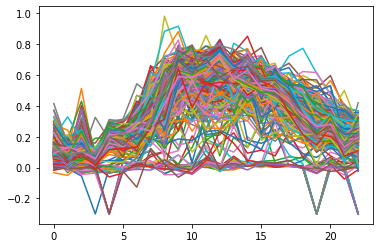

(23, 588)


In [16]:
# load data
df_evi = pd.read_csv('./data/EVI_Ithaca_ST.csv')
plt.plot(df_evi.values)
plt.show()
print(df_evi.shape)

No handles with labels found to put in legend.


[[-0.04308696 -0.02654203  0.03302089 ...  0.01446612  0.01297537
  -0.01553417]
 [-0.04318898 -0.02243486  0.00448367 ... -0.03382849  0.00976565
  -0.0330509 ]
 [-0.02615717 -0.01396771 -0.07764789 ... -0.14283157 -0.15708086
  -0.01914098]
 ...
 [-0.04208857 -0.02971868  0.02356687 ... -0.0679597   0.0537035
  -0.00772045]
 [-0.04268403 -0.01819388  0.04493831 ...  0.00555585  0.0066188
   0.02213582]
 [-0.04290842 -0.03925083  0.01843223 ...  0.00817068 -0.01528759
  -0.03093659]]
[0.88054597 0.02411752 0.01479918 0.01061896 0.007938   0.00740846
 0.0065269  0.00605799 0.0053474  0.00514505]


(-35.12262046128419, 41.474264099768796, -6.50226786669211, 12.890304821037006)

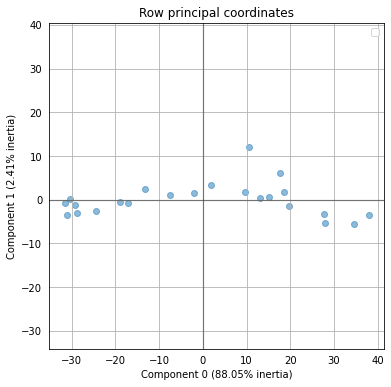

In [17]:
# PCA of the 23 by 588 data matrix
var_list = [f'Grid i' for i in range(588)]
X = df_evi.values
X_std = zscore(X,axis=0) # for post-processing purposes

pca = prince.PCA(
        n_components=10, # only extract first 10
        rescale_with_mean=True,
        rescale_with_std=True,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=1)



pca = pca.fit(X)
# get the transformed data
Y = pca.transform(X)
A = pca.V_.T
print(A)
print(pca.explained_inertia_)

# visualization of the results
ax = pca.plot_row_coordinates(
     X,
     ax=None,
     figsize=(6,6),
     x_component=0,
     y_component=1,
     labels=None,
     ellipse_outline=False,
     ellipse_fill=True,
     show_points=True,
     alpha=0.5
 )
ax.axis('equal')

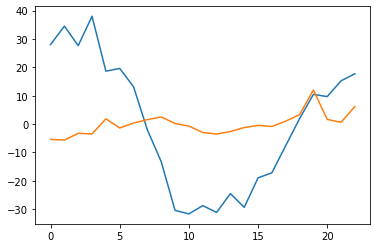

In [18]:
# average temporal patterns
plt.plot(np.arange(23),Y.values[:,0:2])
plt.show()

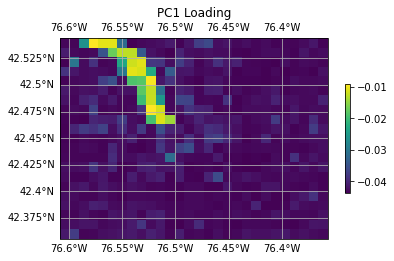

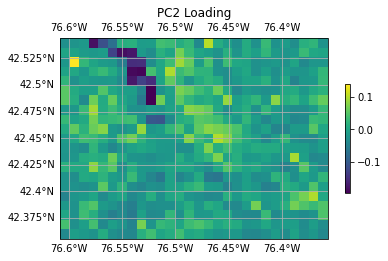

In [19]:
# plot spatial pattern of the loading
filename = './data/2019_07_12.tif'
src = rasterio.open(filename, 'r')
im = src.read()
# read image into ndarray

# transpose the array from (band, row, col) to (row, col, band)
im = np.transpose(im, [1,2,0])
# get EVI, the second band
EVI = im[:,:,1].squeeze() / 10000.# calculate extent of raster
# transform to cartopy format, left, right, low, up
img_extent = [src.bounds[0],src.bounds[2],src.bounds[1],src.bounds[3]]

# define cartopy crs for the raster, based on rasterio metadata
crs = ccrs.PlateCarree()

# create figure
fig = plt.figure()
ax = plt.axes(projection=crs)
plt.title('PC1 Loading')
#ax.set_xmargin(0.05)
#ax.set_ymargin(0.10)

# plot raster
him = plt.imshow(np.reshape(A[:,0],im.shape[0:2]), 
                 origin='upper',extent=img_extent, 
                 transform=crs, interpolation='nearest')

# add grid lines
hg = ax.gridlines(draw_labels=True)
hg.right_labels = False

plt.colorbar(him,ax=ax, shrink=.5)

plt.show()

# PC2 loading
# create figure
fig = plt.figure()
ax = plt.axes(projection=crs)
plt.title('PC2 Loading')
#ax.set_xmargin(0.05)
#ax.set_ymargin(0.10)

# plot raster
him = plt.imshow(np.reshape(A[:,1],im.shape[0:2]), 
                 origin='upper',extent=img_extent, 
                 transform=crs, interpolation='nearest')

# add grid lines
hg = ax.gridlines(draw_labels=True)
hg.right_labels = False

plt.colorbar(him,ax=ax, shrink=.5)

plt.show()


(0.9854981752146116, 1.1588192848974376e-17)
(0.9863630800295206, 6.098707657210982e-18)
(0.5975095507252972, 0.0026063916423380608)
(0.7127866371486324, 0.00013519036198904108)
(0.48835068753356276, 0.018064195485164428)


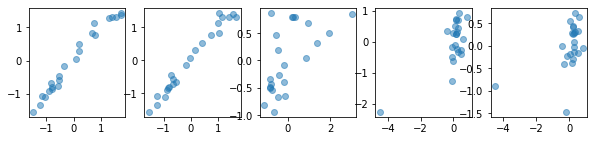

In [20]:
# dimension reduction
k=2
X_std_r = np.array(np.mat(Y)[:,0:k] * A.T[0:k,:])

# scatter plot reconstructed data with raw data

fig, axes = plt.subplots(1,5,figsize=(5*2,2))
for i, ax in enumerate(axes):
    ax.scatter(X_std[:,i],X_std_r[:,i],alpha=0.5)
    print(pearsonr(X_std[:,i],X_std_r[:,i]))

#### 3. (Multiple) Correspondence Analysis for Categorical Data

PCA works for quantitative numeric data. What about categorical data?

Correpondence Analysis (CA, two-way contingency table) and Multiple Correspondence Analysis (MCA, multiple-way contingency table) applies similar transformation to inform the similarity/difference of the categorical variables.

[extended reading](https://codefying.com/2018/12/21/introduction-to-correspondence-analysis/)


In [21]:
df_bci = pd.read_excel('../Lecture2/data/bci_census.xlsx')
# a 200 m by 500 m quadrat of the whole census (10 Ha)
# subset to 100m by 100m and only include alive trees
df_plot = df_bci.query('(gx < 200) & (gy < 100) & DFstatus == "alive"')

# contruct a contingency table records the distribution of tree size for top 10 abundant species

sp_list = df_plot['sp'].value_counts()[0:10].index
print(sp_list)

Index(['hybapr', 'faraoc', 'des2pa', 'mourmy', 'alsebl', 'tri2tu', 'protpa',
       'pri2co', 'pipeco', 'soroaf'],
      dtype='object')


In [22]:
df_bci.columns

Index(['treeID', 'sp', 'quadrat', 'gx', 'gy', 'dbh', 'DFstatus'], dtype='object')

In [23]:
size_list = [1,5,10,30,60,80,100]

ctg_table = [[df_plot.query(
                        ' & '.join([f'(sp == "{sp}")',
                                    f'(dbh >= {size_edge * 10})',
                                    f'(dbh < {size_list[isize+1] * 10})'
                                   ])
                            ).shape[0] 
              for isize, size_edge in enumerate(size_list[0:-1])] 
             for sp in sp_list]

# each column is a species
# each row is a size
ctg_table = np.array(ctg_table).T

df_ctg = pd.DataFrame(ctg_table,columns=sp_list,index=size_list[0:-1])

In [24]:
df_ctg

,hybapr,faraoc,des2pa,mourmy,alsebl,tri2tu,protpa,pri2co,pipeco,soroaf
1,1005,677,446,407,272,195,223,178,157,163
5,27,140,63,2,42,38,24,29,0,28
10,0,35,1,0,28,41,3,22,0,2
30,0,0,0,0,6,13,0,6,0,0
60,0,0,0,0,1,0,0,3,0,0
80,0,0,0,0,0,0,0,4,0,0


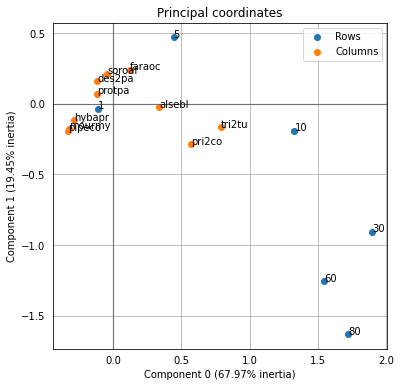

[0.6797328479477796, 0.19452893932990054]


In [25]:
ca = prince.CA(
    n_components=2,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42)

ca = ca.fit(df_ctg)

ax = ca.plot_coordinates(
     X=df_ctg,
     ax=None,
     figsize=(6, 6),
     x_component=0,
     y_component=1,
     show_row_labels=True,
     show_col_labels=True
 )
plt.show()
print(ca.explained_inertia_)

In [26]:
print(ca.row_coordinates(df_ctg))
print(ca.column_coordinates(df_ctg))

           0         1
1  -0.109975 -0.033674
5   0.441906  0.470112
10  1.327636 -0.190829
30  1.897719 -0.906335
60  1.546903 -1.255145
80  1.722434 -1.629029
               0         1
hybapr -0.289594 -0.116124
faraoc  0.120542  0.241676
des2pa -0.118166  0.160072
mourmy -0.325181 -0.176850
alsebl  0.336597 -0.023559
tri2tu  0.786336 -0.164037
protpa -0.120471  0.072547
pri2co  0.568227 -0.287495
pipeco -0.333362 -0.190809
soroaf -0.045505  0.214102


* Interpretation of CA output
    * closer to origin --> less discriminated/special, e.g. size class 1
    * farther away to origin --> more discriminated, e.g. size class 100
    * closer dots are more similar

#### 4. Multiple Factor Analysis (MFA)

PCA does not consider any structure within the data (e.g. groups, location, sampling time, species).

MFA considers the structure by first conducting PCA within each group separately and then conducting a global PCA.

[extended reading](https://personal.utdallas.edu/~herve/Abdi-MFA2007-pretty.pdf)

Here, we will use the PEP725 phenology data from HM1 as an example.

phenological dates vary by location within each species. So we can treat species as an over-arching group.

In [27]:
df_pheno = pd.read_csv('./data/data_combined.csv')

# reorganize the data

# for each species find stations that cover 1961-2000 (40 years)
year_range = range(1961,2000+1)

sp_list = ['FASY','BEPE','QURO']
df_list = []
for isp, sp in enumerate(sp_list):
    df_sub = df_pheno.query(f'(sp=="{sp}")&(YEAR>=1961)&(YEAR<=2000)')
    station_list = df_sub['PEP_ID'].value_counts()
    station_list = station_list[station_list == len(year_range)].index
    df_sub = df_sub[df_sub.PEP_ID.isin(station_list)]
    df_list.append(df_sub)

# join them together
df_full = pd.concat(df_list)

# get all sp_station combinations
columns = [f'{sp}_{PEP_ID}' 
           for sp in sp_list
           for PEP_ID in df_full.query(f'sp=="{sp}"').PEP_ID.value_counts().index 
           ]

bb_data = []
for i, col_name in enumerate(columns):
    subs = col_name.split('_')
    sp = subs[0]
    PEP_ID = int(subs[1])
    
    # create a dataframe for Year and BB
    bb_data.append(df_full.query(f'(sp=="{sp}")&(PEP_ID=={PEP_ID})').DAY_BB.values)
    

df_bb = pd.DataFrame(np.transpose(bb_data),columns=columns,index=year_range)

In [28]:
# create a dictionary indicating groups
groups = {}
for sp in sp_list:
    groups[sp] = [col_name for col_name in columns if col_name.split('_')[0] == sp]
    
print(groups)

{'FASY': ['FASY_2075', 'FASY_2294', 'FASY_2390', 'FASY_4445', 'FASY_4495', 'FASY_427', 'FASY_4539', 'FASY_2496', 'FASY_4615', 'FASY_531', 'FASY_2808', 'FASY_2886', 'FASY_2916', 'FASY_977', 'FASY_3088', 'FASY_3124', 'FASY_1119', 'FASY_1127', 'FASY_3230', 'FASY_3264', 'FASY_3290', 'FASY_3346', 'FASY_3378', 'FASY_3482', 'FASY_1469', 'FASY_1619', 'FASY_3694', 'FASY_3798', 'FASY_3876', 'FASY_4415', 'FASY_4333', 'FASY_4172', 'FASY_2242', 'FASY_4256', 'FASY_2241', 'FASY_202', 'FASY_4340', 'FASY_2415', 'FASY_480', 'FASY_4584', 'FASY_4632', 'FASY_638', 'FASY_2853', 'FASY_3023', 'FASY_3065', 'FASY_3071', 'FASY_3087', 'FASY_3105', 'FASY_1074', 'FASY_3143', 'FASY_3579', 'FASY_3633', 'FASY_3959', 'FASY_3997', 'FASY_1980', 'FASY_4055', 'FASY_4057', 'FASY_2126', 'FASY_2140', 'FASY_4239', 'FASY_4054'], 'BEPE': ['BEPE_4230', 'BEPE_1119', 'BEPE_3346', 'BEPE_5413', 'BEPE_3378', 'BEPE_3482', 'BEPE_1469', 'BEPE_3526', 'BEPE_3534', 'BEPE_5621', 'BEPE_3633', 'BEPE_3693', 'BEPE_5788', 'BEPE_3750', 'BEPE_3798'

In [29]:
mfa = prince.MFA(
     groups=groups,
     n_components=3,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
 )
mfa = mfa.fit(df_bb)

<AxesSubplot:>

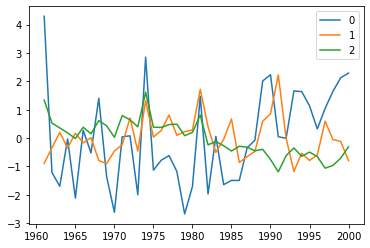

In [30]:
mfa.row_coordinates(df_bb).plot()

No handles with labels found to put in legend.


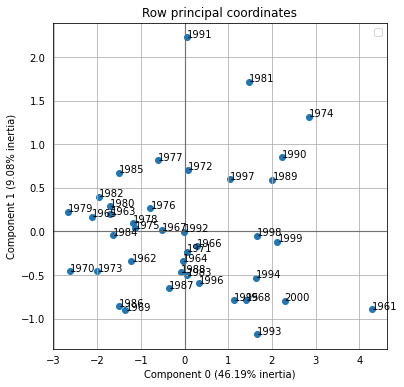

In [31]:
ax = mfa.plot_row_coordinates(
     df_bb,
     ax=None,
     figsize=(6, 6),
     x_component=0,
     y_component=1,
     labels=df_bb.index,
     ellipse_outline=False,
     ellipse_fill=True,
     show_points=True)

In [32]:
mfa.partial_row_coordinates(df_bb)

BEPE                          FASY                          QURO  \
             0         1         2         0         1         2         0   
1961  2.884939  2.619121  0.798903  4.705893 -2.701461  1.071880  5.295339   
1962 -1.365828 -1.584870  0.302367 -0.993839  0.286454  0.942987 -1.287351   
1963 -1.000548 -0.997759  0.360074 -2.286767  0.941053  0.863762 -1.807281   
1964 -0.149543 -0.370113  0.215236  0.203281 -0.606196  0.212012 -0.144355   
1965 -1.973284 -1.737105 -0.176115 -1.984948  1.027587  0.382981 -2.388441   
1966  0.149587  0.060658  0.672462  0.218906 -0.333563  0.226649  0.466668   
1967 -0.222004  0.008725  0.243643 -0.646115  0.004468  0.244105 -0.699340   
1968  0.466148  0.246286  0.142190  2.090833 -1.465697  0.449665  1.659081   
1969 -1.957264 -2.240716  0.409918 -1.594584  0.126600  0.340799 -0.509225   
1970 -2.946797 -2.994854  0.206842 -2.726853  1.056730  0.152841 -2.177790   
1971 -0.057017 -0.084270  0.676775 -0.310716 -0.275717  1.115714  0.506589   
1972  0.523332  1.128366  0.237511  0.087171  0.275531  0.639825 -0.372381   
1973 -2.295527 -2.436748  0.415908 -1.817810  0.414563  0.611567 -1.873652   
1974  3.939558  3.792089  0.775620  2.474403 -0.110314  1.284512  2.145526   
1975 -1.185624 -1.363941  0.165186 -0.906296  0.585279  0.366400 -1.296798   
1976 -0.627906 -0.448625  0.276220 -0.833763  0.492305  0.220124 -0.878928   
1977  0.415753  1.122216  0.856587 -0.805213  0.406445  0.276014 -1.459484   
1978 -1.018489 -0.923077  0.198939 -1.379028  0.587811  0.495246 -1.130449   
1979 -2.130491 -1.641939  0.141630 -2.968343  1.315330 -0.071018 -2.921801   
1980 -1.782397 -1.370887  0.117374 -1.266793  0.865427  0.135497 -2.069582   
1981  2.516272  2.592711  0.375852 -0.120741  1.395546  0.692874  2.018444   
1982 -1.885518 -1.604309 -0.366150 -2.402415  1.526137 -0.140686 -1.622690   
1983 -0.435106 -0.749958 -0.032272  0.604347 -0.540310  0.015064  0.015447   
1984 -1.825605 -1.855571 -0.230447 -0.972380  0.223585 -0.009686 -2.128809   
1985 -0.159243  0.031064 -0.136857 -2.639871  1.359436 -0.370542 -1.678819   
1986 -1.831088 -2.252275  0.309128 -1.617835  0.067876 -0.143549 -1.033930   
1987 -1.052213 -1.288189 -0.028205  0.242993 -0.584138 -0.230768 -0.233885   
1988 -0.446816 -0.747942 -0.119790  0.359482 -0.178215 -0.428065 -0.134740   
1989  2.407793  2.485536 -0.160069  2.134826 -0.329013 -0.841874  1.492283   
1990  3.153239  3.543559 -1.196063  2.081822 -0.332400 -0.997692  1.473423   
1991  1.666706  1.991883 -0.883249 -0.571814  1.897912 -1.150911 -0.948313   
1992 -0.047734  0.101085 -0.640223  0.312592 -0.236370 -0.384282 -0.293065   
1993  0.474667  0.138703 -0.488365  1.859480 -1.518329 -0.408561  2.649553   
1994  1.057319  0.908571 -0.480329  1.703695 -1.070226 -0.815129  2.157026   
1995  0.253981 -0.063849 -0.161030  1.571959 -1.028521 -0.714972  1.585316   
1996 -0.345385 -0.730183 -0.243552  0.626113 -0.613628 -0.445523  0.688537   
1997  1.902053  2.082514 -0.647872  0.600932  0.022845 -1.273073  0.633987   
1998  1.691679  1.659192 -0.632072  1.614322 -0.491415 -1.048716  1.636616   
1999  1.941720  1.878480 -0.802280  2.529666 -0.963594 -0.782590  1.911609   
2000  1.296683  1.096421 -0.473424  2.823409 -1.499811 -0.482881  2.755664   

                          
             1         2  
1961 -2.591500  2.140700  
1962  0.277557  0.344045  
1963  0.655727 -0.153298  
1964 -0.053222  0.129677  
1965  1.215688 -0.256553  
1966 -0.231192  0.248613  
1967  0.026860 -0.034187  
1968 -1.151261  1.257266  
1969 -0.595218  0.551610  
1970  0.569549 -0.273404  
1971 -0.336123  0.585107  
1972  0.716851  1.050778  
1973  0.645203  0.167486  
1974  0.262611  2.789289  
1975  0.885736  0.624696  
1976  0.751510  0.630006  
1977  0.911638  0.296108  
1978  0.629055  0.780106  
1979  0.997024  0.184967  
1980  1.364687  0.348131  
1981  1.167062  1.365617  
1982  1.268785 -0.211327  
1983 -0.216433 -0.346600  
1984  1.496829 -0.566521  
1985  0.629528 -0.863011  
1986

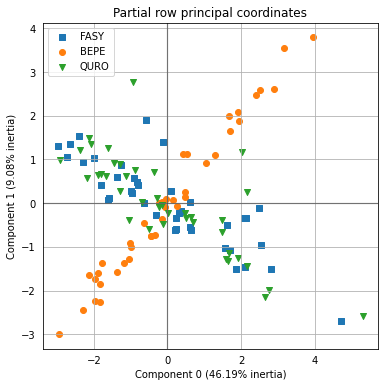

In [33]:
ax = mfa.plot_partial_row_coordinates(
     df_bb,
     ax=None,
     figsize=(6, 6),
     x_component=0,
     y_component=1,
 )

In [34]:
mfa.explained_inertia_

array([0.46190083, 0.0908106 , 0.06637198])

No handles with labels found to put in legend.


[[-0.09157393  0.09221005  0.01006079 ... -0.09616303 -0.07367394
   0.14950741]
 [-0.09242578  0.1010248   0.09925764 ... -0.00207798 -0.02486104
   0.01680211]
 [-0.08697279 -0.02438327  0.0814888  ...  0.03939825  0.00361855
  -0.02197625]
 ...
 [-0.0868505   0.07567253  0.04733663 ... -0.10686249 -0.0257613
  -0.06939176]
 [-0.07489329  0.07263921 -0.10596585 ...  0.13761789 -0.16349497
  -0.02438971]
 [-0.05684008  0.10832702 -0.11325533 ...  0.16511746  0.09910058
  -0.00748254]]
[0.46623898 0.09140989 0.06453137 0.03965798 0.03355983 0.02670945
 0.02394427 0.02077787 0.01942768 0.01753625]


(-15.19866272968957, 22.67612704791958, -6.489916043072369, 11.611481673134948)

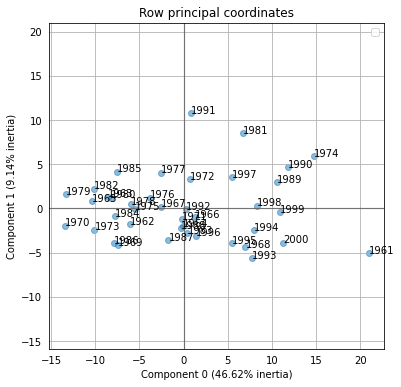

In [35]:
# compare with naive PCA

# PCA of the 23 by 588 data matrix
X = df_bb.values
X_std = zscore(X,axis=0) # for post-processing purposes

pca = prince.PCA(
        n_components=10, # only extract first 10
        rescale_with_mean=True,
        rescale_with_std=True,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=1)



pca = pca.fit(X)
# get the transformed data
Y = pca.transform(X)
A = pca.V_.T
print(A)
print(pca.explained_inertia_)

# visualization of the results
ax = pca.plot_row_coordinates(
     X,
     ax=None,
     figsize=(6,6),
     x_component=0,
     y_component=1,
     labels=df_bb.index,
     ellipse_outline=False,
     ellipse_fill=True,
     show_points=True,
     alpha=0.5
 )
ax.axis('equal')


<AxesSubplot:>

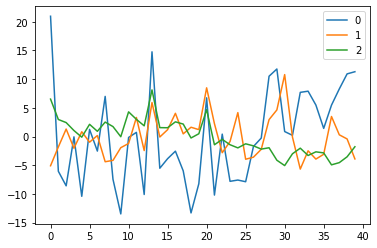

In [37]:
Y.iloc[:,0:3].plot()

* For mixed numeric and categorical data, Factor analysis of mixed data (FAMD) can be used

#### 4. PCA + Regression

In multiple regressions, multi-collinearity is usually a challenging problem (recall how to detect collinearity and how to deal with it in regression analysis).

The concept of PCA (i.e., rotate the data to get orthogonal dimensions/variables) provides another approach, which will allow us to use all the data (no variable selection) but is harder to interpret (the meaning of each PC is less informative).

Now, consider a set of predictors **X** and a set of response variables **Y**. We can perform transformation for both of them as follows:

$X = TP^T + E$

$Y = UQ^T + F$

Here, *P* and *Q* are orthogonal loading matrices as in PCA. *T* and *U* are transformed orthogonal components with lower dimensions than X and Y. *E* and *F* are error terms.

**Partial Least Squares Regressions** (PLSR or PLS) searches the transformation P and Q so that the covariance between T and U are maximized. Similarly **Canonical Correlation Analysis** (CCA) searches the transformation P and Q so that the correlation between T and U are maximized.

PLSR and PLS are widely used for predictions using spectroscopy and genetic data (high multi-collinearity) but the interpretation of the results can be tricky.

In [71]:
# Here we will use the phenology data at one PEP station (3945) to demonstrate PLSR
df_test = df_pheno.query('(YEAR>=1980) & (YEAR <= 2014)&(PEP_ID == 3945)')

bb_data = {
'YEAR' : range(1980,2014+1),
'BB_FASY' : df_test.query('sp =="FASY"')['DAY_BB'].values,
'BB_BEPE' : df_test.query('sp =="BEPE"')['DAY_BB'].values,
'BB_QURO' : df_test.query('sp =="QURO"')['DAY_BB'].values,
}

df_plsr = pd.DataFrame(bb_data)

df_plsr

,YEAR,BB_FASY,BB_BEPE,BB_QURO
0,1980,130,110,136
1,1981,135,99,131
2,1982,130,114,136
3,1983,123,112,126
4,1984,131,118,140
5,1985,131,114,132
6,1986,123,116,126
7,1987,122,114,127
8,1988,127,113,128
9,1989,119,100,124


In [72]:
# read climate data
df_climate = pd.read_csv('./data/PEP3945_climate_ERA5.csv')

# treat each doy as a dimension/variable
var_list = [f'tavg_{doy}' for doy in range(1,300)]
tavg_data = {'year' : list(range(1980,2014+1))}
for var in var_list:
    doy = int(var.split('_')[1])
    tavg_data[var] = df_climate.query(f'doy=={doy}').tavg.values

df_tavg = pd.DataFrame(tavg_data)
df_tavg

,year,tavg_1,tavg_2,tavg_3,tavg_4,tavg_5,tavg_6,tavg_7,tavg_8,tavg_9,...,tavg_290,tavg_291,tavg_292,tavg_293,tavg_294,tavg_295,tavg_296,tavg_297,tavg_298,tavg_299
0,1980,272.070007,271.155762,270.009430,269.989838,273.866119,274.067841,274.091797,273.208099,272.222412,...,283.799438,284.999908,280.478729,279.253113,276.606384,277.824768,279.225708,280.457977,282.563538,280.321381
1,1981,274.521606,273.965607,277.283295,275.203094,272.206268,270.737762,267.215118,262.764099,263.085724,...,281.752899,285.458466,284.165894,283.699951,280.726990,276.657806,277.072937,276.564789,276.301056,277.378143
2,1982,276.178864,275.838898,277.643341,278.532501,280.344238,274.143768,265.253021,263.713593,265.033020,...,279.079987,282.641449,282.422882,282.339386,281.755219,282.158234,283.242584,282.916046,280.372406,279.336151
3,1983,271.640961,272.870331,276.256927,280.838898,280.005310,282.304443,277.164154,274.552307,275.103424,...,280.527527,281.484650,284.443817,282.106995,278.453461,275.994110,276.623535,276.055145,276.742035,279.969391
4,1984,276.399658,275.167297,278.107605,274.589905,273.058075,272.637115,275.020599,274.285431,273.150513,...,281.327209,281.054291,283.455109,286.496674,284.896057,282.106598,281.073029,284.632690,284.375916,284.697998
5,1985,270.028717,270.242340,266.284058,262.189392,261.030823,258.735840,255.814743,253.699829,254.357895,...,279.261200,279.470673,279.859894,278.165771,278.378754,277.123901,279.172272,277.904938,278.409882,277.643707
6,1986,269.416229,271.485352,275.101776,272.441223,271.571075,273.415466,272.396912,269.013000,270.109375,...,280.368073,279.821503,281.661407,281.907471,280.704071,286.222107,280.769501,278.303986,278.598877,279.553741
7,1987,279.792755,277.608948,269.838440,270.819489,274.152008,274.503601,268.215302,267.274231,268.497162,...,283.513824,281.642609,280.883362,280.820679,281.057159,280.798492,280.995728,282.432526,279.925568,278.967957
8,1988,277.898071,281.889374,280.345001,279.071869,282.056366,278.935516,277.472900,274.705658,272.660583,...,286.164185,286.487335,286.161224,287.043488,284.492645,282.695801,282.698853,280.659393,282.394928,282.369537
9,1989,274.567352,275.406677,272.222351,271.522125,273.171173,275.789154,275.404175,277.733215,278.741547,...,280.744598,281.028473,282.086945,282.664154,286.557800,286.045197,285.443329,285.571075,285.148071,284.925690


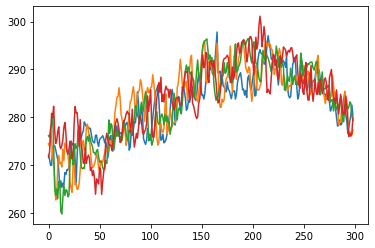

In [79]:
plt.plot(df_tavg.iloc[0:4,1::].values.T)
plt.show()

In [130]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split

X = zscore(df_tavg.iloc[:,1:100] - 273.15)
Y = zscore(df_plsr.iloc[:,1::])


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

pls2 = PLSRegression(n_components=3)
pls2.fit(X_train, Y_train)
print(pls2.score(X_train,Y_train)) # diagnostics
print(pls2.score(X_test,Y_test)) # prediction

0.7292315154098926
-1.9158164702293023


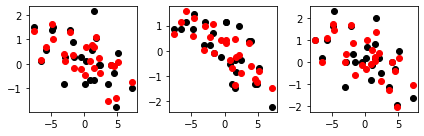

In [131]:
Y_train_pred = pls2.predict(X_train)
fig, axes = plt.subplots(1,3,figsize=(6,2))
for i, ax in enumerate(axes):
    ax.scatter(pls2.transform(X_train)[:,0],Y_train[:,i],c='k')
    ax.scatter(pls2.transform(X_train)[:,0],Y_train_pred[:,i],c='r')

fig.tight_layout()
plt.show()

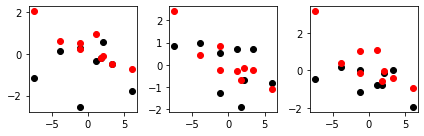

In [132]:
Y_pred = pls2.predict(X_test)
fig, axes = plt.subplots(1,3,figsize=(6,2))
for i, ax in enumerate(axes):
    ax.scatter(pls2.transform(X_test)[:,0],Y_test[:,i],c='k')
    ax.scatter(pls2.transform(X_test)[:,0],Y_pred[:,i],c='r')

fig.tight_layout()
plt.show()

In [119]:
X_test

,tavg_1,tavg_2,tavg_3,tavg_4,tavg_5,tavg_6,tavg_7,tavg_8,tavg_9,tavg_10,...,tavg_90,tavg_91,tavg_92,tavg_93,tavg_94,tavg_95,tavg_96,tavg_97,tavg_98,tavg_99
14,2.992487,4.638385,9.102734,14.437231,19.628448,24.981897,32.645343,36.670758,40.618475,42.971985,...,333.141266,342.471124,346.334949,348.682172,352.330420,355.884338,358.907526,363.081958,367.304211,370.450751
19,-1.264227,-3.515820,-1.109821,5.223608,13.187225,17.756128,24.409412,28.402753,30.642737,31.879578,...,165.661224,176.439783,187.160815,197.978680,207.627112,217.205780,229.640100,238.750812,245.744946,253.414648
3,-1.509039,-1.788708,1.318219,9.007117,15.862427,25.016870,29.031024,30.433331,32.386755,36.292847,...,146.604156,153.585931,159.569843,163.307660,166.591345,170.478210,174.751215,180.232104,191.540936,199.599921
29,-3.989233,-8.564374,-15.376575,-19.706110,-23.620209,-29.512976,-37.902753,-46.725513,-58.413995,-69.700378,...,-30.691010,-22.276831,-8.699567,4.735181,17.535468,29.898743,42.615106,56.056537,68.986920,82.242987
33,2.117731,4.378192,6.430249,12.490942,18.672150,23.518976,28.562488,31.894269,34.532324,36.040527,...,-14.963776,-15.367407,-14.450787,-13.520435,-12.373560,-11.443054,-9.887122,-8.157971,-4.529132,1.276007
28,-1.578192,-4.414624,-7.233600,-9.233606,-10.498871,-9.429602,-7.085553,-4.108783,-2.594415,1.666168,...,280.504089,290.021875,299.888751,307.047986,311.435370,316.814270,322.308344,326.701892,328.839063,331.878790
22,-5.324408,-9.981458,-19.056079,-31.881403,-42.992981,-53.152472,-56.970258,-61.996570,-68.350458,-77.325623,...,253.295380,263.450281,274.073932,285.626050,295.301489,300.478394,302.333337,304.970142,309.320172,314.912878
27,7.447198,9.014392,12.164349,16.855048,22.230225,29.121515,35.243274,40.882184,50.687811,60.147064,...,423.416992,433.394098,443.561328,451.319867,455.901923,462.448090,472.427179,482.347125,490.470349,500.653387
26,1.713434,1.641772,1.486371,0.538458,-0.049622,0.330743,0.169727,-1.602405,-5.969904,-12.074646,...,-111.441162,-100.472540,-90.091077,-82.937823,-77.281641,-74.956635,-72.431433,-68.288190,-60.641528,-53.840906


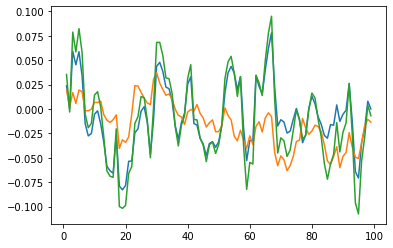

In [134]:
plt.plot(range(1,100),pls2.coef_)

#### 6. Summary

#### Appendix

In [56]:
# EVI data acquisition from GEE
import ee

try:
    ee.Initialize()
except:
    # need to authenticate with your credential at the first time
    ee.Authenticate()
    ee.Initialize()
#import geemap 
import geemap.eefolium as geemap

# lat and lon for Corson Hall, where this course should be happening...
corson_loc = [42.447, -76.479]


In [ ]:
# identify a 10km buffer around our Point Of Interest (POI)
poi = ee.Geometry.Point(corson_loc[1],corson_loc[0]).buffer(10000)

# get MODIS Enhanced Vegetation Index (EVI) MOD13Q1.006
# https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MOD13Q1
    
collection = (
    ee.ImageCollection('MODIS/006/MOD13Q1')   # name of image collection
      .filterDate('2019-01-01', '2020-01-01') # filter by time, get growing season in 2019
      .filterBounds(poi)                      # filter by location
            )

# reproject and clip
collection_clip = collection.map(lambda img: img.reproject('EPSG:4326',None,100).clip(poi.bounds()))
print(collection_clip.size().getInfo())
geemap.ee_export_image_collection(collection_clip, out_dir='./data/')

In [58]:
# combine all EVI data into a table
# row is time, column is space
import numpy as np
import pandas as pd
from pathlib import Path
import rasterio


# get the filenames for all tif files
data_path = Path('./data/') 
file_list = np.array(sorted(list(data_path.glob('*.tif'))))

# space and time data
evi_st = []
for filename in file_list:
    src = rasterio.open(filename, 'r')
    im = src.read()
    # read image into ndarray

    # transpose the array from (band, row, col) to (row, col, band)
    im = np.transpose(im, [1,2,0])
    # get EVI, the second band
    EVI = im[:,:,1].squeeze() / 10000.
    
    # squeeze lat and lon append into evi_st
    evi_st.append(EVI.ravel())
    
evi_st = np.array(evi_st)
df_evi_st = pd.DataFrame(evi_st)
df_evi_st.to_csv('./data/EVI_Ithaca_ST.csv',index=False)

In [48]:
# download ERA5 climate data for PEP station

# Appendix
# Appendix, data extraction for ERA5 through GEE
import pandas as pd

import ee

try:
    ee.Initialize()
except:
    # need to authenticate with your credential at the first time
    ee.Authenticate()
    ee.Initialize()
    
import geemap.eefolium as geemap


loc = [48.9,11.6167]

# identify a 100 meter buffer around our Point Of Interest (POI)
poi = ee.Geometry.Point(loc[1],loc[0]).buffer(100)

# variable of interests
clim_vars = ['mean_2m_air_temperature','minimum_2m_air_temperature','maximum_2m_air_temperature','total_precipitation']
output_vars = ['tavg','tmin','tmax','prcp']


df_list = []
# loop over every 5 years since python api does not allow for more than 5000 retrievals
for year in range(1980, 2015,5):
    # save time-series
    collection = (
        ee.ImageCollection('ECMWF/ERA5/DAILY')   # name of image collection
          .filterDate(f'{year}', f'{year+5}') # filter by time
          .filterBounds(poi)                      # filter by location
                )

    
    def poi_mean(img):
        res =  img.set('date', img.date().format())
        for i, var in enumerate(clim_vars):
            mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=poi, scale=250).get(var)
            res =  res.set(output_vars[i],mean)
        return res

    poi_reduced_imgs = collection.map(poi_mean)

    nested_list = poi_reduced_imgs.reduceColumns(ee.Reducer.toList(len(output_vars)+1), ['date']+output_vars).values().get(0)

    # get data from GEE
    df = pd.DataFrame(nested_list.getInfo(), columns=['date']+output_vars)
    
    # append the data into the list
    df_list.append(df)

# now concatenate all the data together
df_full = pd.concat(df_list)


# manipulate with the date information
df_full['date'] = pd.to_datetime(df_full['date'])
df_full = df_full.set_index('date')

df_full['year'] = df_full.index.year
df_full['month'] = df_full.index.month
df_full['doy'] = df_full.index.dayofyear

# save
df_full.to_csv('PEP3945_climate_ERA5.csv')
